# <center>Assignment 2: Convolutional Neural Network</center>
**<center>Deep Learning | Spring 2022 | Shahid Beheshti University</center>**


Welcome to the **second** programming assignment of the Deep Learning course. 

---

<b>overview</b>:

The goal of this assignment is to get you familiarized with convolutional neural networks. 

First, we will train a CNN model as our base model to solve the Image Colorization task. In general, Image Colorization is a difficult problem e.g. a grayscale image, may have several valid coloring images.

After training, we will add some configurations to it to check their effect and then analyze it.



---
<b>Submission tips</b>:

please review the notes of **this notebook** and whatever is in the **assignment file**.

You can implement other than functions that exist in PY files or change the structure of the notebook based on the given Questions.



<b> What these codes do (exist in PY files)</b>:

There are four PY files that are required to run the CNN.ipynb. Below, the functionality of each PY file are summarized, but more details are provided in the files themselves.

- utils.py: Contain several functions for data preprocessing.
- torch_helper.py: Contain several functions used during the training process. `some of them required to implement`
- model.py: Contains several classes as the models and their blocks (base model and custom U-Net). `required to implement`
- train.py: as the its name show it is for training and validating model. `required to implement`


----
<b>Due date:</b> 10 Ordibehesht 1401 - 11:59 pm
 

 > **_NOTE:_** Alongside the `CNN.ipynb` notebook, there are some python files with the coding parts you need to implement are denoted by: ``` # YOUR CODE #```. Moreover, some <u>Questions</u> are given in the assignment file. 
 
 
 ---


<p style="color:red;">! Probably you need GPU to train your model so you may use your graphic of your system or if you are on Colab don't forget to enable that:</p>
<b><blockquote>Runtime -> Change runtime type -> Hardware Accelator: GPU</blockquote>


# Packages and modules

Let's first import all the packages that you will need during this assignment.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/project-2



# Pytorch library and other packages

import torch
from utils import *

from train import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/project-2


# Constants

In [2]:
colours_dic_addr = 'car_colours_kmeans24.npy'
your_student_id = 400443183 

# other constants if needed

# Dataset


## Prepare Dataset: cifar10


**CIFAR-10** is considered for this assignment which consists of images of size 32x32 pixels. For simplicity, one category of this dataset is considered (automobile).
The input and output of the network will be the grayscale image and RGB image respectively. by **running** the following code blocks get the dataset.

The subset of **24 colors** that are selected to colorize the grayscale images is provided in the car_colours_kmeans24.npy file.

File path: data/cifar-10-batches-py.tar.gz


Length Car Colors:  24 		 Shape Car Colors:  (24, 3) 


x_train:  (50000, 3, 32, 32) 	  y_train:  (50000, 1) 

x_test:  (10000, 3, 32, 32) 	  y_test:  (10000, 1) 



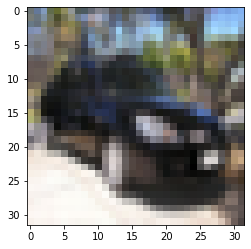

In [3]:
# Download CIFAR dataset
(x_train, y_train), (x_test, y_test) = load_cifar10()

# LOAD THE COLOURS CATEGORIES
colours = np.load(colours_dic_addr, allow_pickle=True, encoding='bytes')


print ("\n\nLength Car Colors: ",len(colours),"\t\t" , "Shape Car Colors: " ,colours.shape ,"\n\n")
print ("x_train: " , x_train.shape , "\t  y_train: " , y_train.shape , "\n")
print ("x_test: " , x_test.shape , "\t  y_test: " , y_test.shape , "\n")


plt.imshow(torch.from_numpy(x_train[212]).permute(1,2,0))

# Image Colorization 

## Base Model

Complete the <code>model.py</code> to train your model

<br>

<p align="center">
  <img src="images/baseModel.png">
</p>

### Training

True
Transforming data...
1
Beginning training ...
Epoch [1/50], Train Loss: 3.15, Train Acc: 10.0% 
Epoch [1/50], Test Loss: 2.78, Test Acc: 13.9% 
Epoch [1/50], Val Loss: 2.88, Val Acc: 13.1% 


Epoch [2/50], Train Loss: 2.65, Train Acc: 15.5% 
Epoch [2/50], Test Loss: 2.46, Test Acc: 19.0% 
Epoch [2/50], Val Loss: 2.45, Val Acc: 19.6% 


Epoch [3/50], Train Loss: 2.40, Train Acc: 20.8% 
Epoch [3/50], Test Loss: 2.30, Test Acc: 22.3% 
Epoch [3/50], Val Loss: 2.31, Val Acc: 22.4% 


Epoch [4/50], Train Loss: 2.27, Train Acc: 23.9% 
Epoch [4/50], Test Loss: 2.13, Test Acc: 28.4% 
Epoch [4/50], Val Loss: 2.16, Val Acc: 28.1% 


Epoch [5/50], Train Loss: 2.17, Train Acc: 26.7% 
Epoch [5/50], Test Loss: 2.05, Test Acc: 31.5% 
Epoch [5/50], Val Loss: 2.07, Val Acc: 31.1% 


Epoch [6/50], Train Loss: 2.11, Train Acc: 28.0% 
Epoch [6/50], Test Loss: 2.01, Test Acc: 32.2% 
Epoch [6/50], Val Loss: 2.02, Val Acc: 32.1% 


Epoch [7/50], Train Loss: 2.07, Train Acc: 29.3% 
Epoch [7/50], Test Loss

BaseModel(
  (downs): ModuleList(
    (0): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
    (1): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
  )
  (bottleneck): Bottleneck(
    (bottle): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (ups): ModuleList(

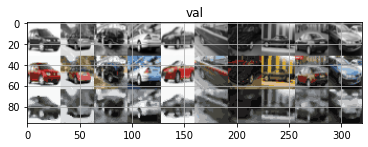

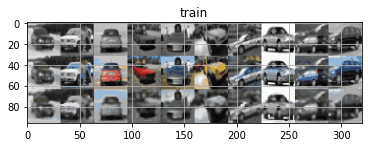

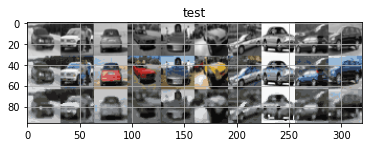

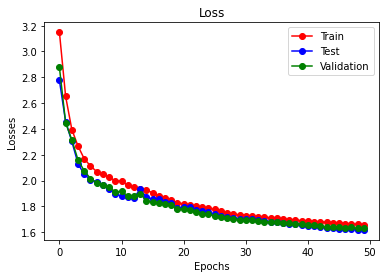

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

import torch
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':True, 
              'num_filters':64,
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"Base", 
              'kernel':3, 
              'learn_rate':0.3, 
              'batch_size':100,
              'epochs':50, 
              'plot':True, 
              'experiment_name': 'colourization_BaseNet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 Call train function                                        #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours , model_mode="Base" ,model="Base")

### Experient2 with Different filter numbers and kernel size and learning rate and batch size


True
Transforming data...
1
Beginning training ...
Epoch [1/50], Train Loss: 2.11, Train Acc: 29.1% 
Epoch [1/50], Test Loss: 1.78, Test Acc: 38.6% 
Epoch [1/50], Val Loss: 1.83, Val Acc: 37.3% 


Epoch [2/50], Train Loss: 1.81, Train Acc: 36.1% 
Epoch [2/50], Test Loss: 1.66, Test Acc: 41.1% 
Epoch [2/50], Val Loss: 1.70, Val Acc: 40.3% 


Epoch [3/50], Train Loss: 1.74, Train Acc: 38.1% 
Epoch [3/50], Test Loss: 1.61, Test Acc: 42.1% 
Epoch [3/50], Val Loss: 1.65, Val Acc: 41.2% 


Epoch [4/50], Train Loss: 1.69, Train Acc: 39.3% 
Epoch [4/50], Test Loss: 1.57, Test Acc: 42.7% 
Epoch [4/50], Val Loss: 1.63, Val Acc: 41.8% 


Epoch [5/50], Train Loss: 1.66, Train Acc: 40.3% 
Epoch [5/50], Test Loss: 1.56, Test Acc: 43.4% 
Epoch [5/50], Val Loss: 1.61, Val Acc: 42.2% 


Epoch [6/50], Train Loss: 1.63, Train Acc: 41.0% 
Epoch [6/50], Test Loss: 1.54, Test Acc: 43.7% 
Epoch [6/50], Val Loss: 1.60, Val Acc: 42.5% 


Epoch [7/50], Train Loss: 1.62, Train Acc: 41.5% 
Epoch [7/50], Test Loss

BaseModel(
  (downs): ModuleList(
    (0): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
    (1): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
  )
  (bottleneck): Bottleneck(
    (bottle): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (ups): ModuleList(
    

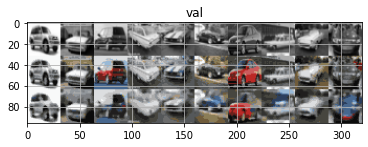

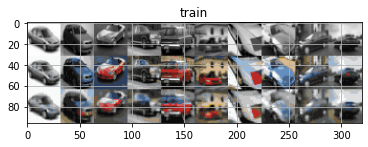

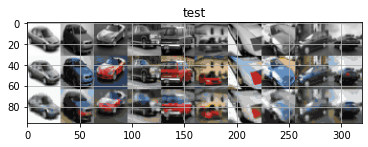

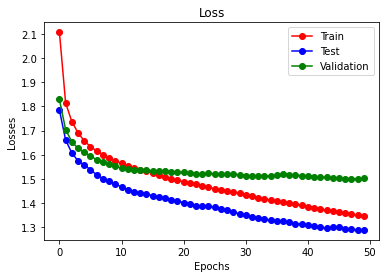

In [10]:
import torch
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':True, 
              'num_filters':32,
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"Base", 
              'kernel':3, 
              'learn_rate':0.01, 
              'batch_size':50,
              'epochs':50, 
              'plot':True, 
              'experiment_name': 'colourization_BaseNet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 Call train function                                        #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours)

## Custom U-Net Model

Complete the <code>model.py</code> to train your model

### Training

True
Transforming data...
1
Beginning training ...
Epoch [1/50], Train Loss: 2.86, Train Acc: 21.2% 
Epoch [1/50], Test Loss: 2.17, Test Acc: 31.6% 
Epoch [1/50], Val Loss: 2.22, Val Acc: 32.6% 


Epoch [2/50], Train Loss: 2.07, Train Acc: 36.3% 
Epoch [2/50], Test Loss: 1.95, Test Acc: 39.9% 
Epoch [2/50], Val Loss: 1.96, Val Acc: 39.4% 


Epoch [3/50], Train Loss: 1.93, Train Acc: 39.9% 
Epoch [3/50], Test Loss: 1.81, Test Acc: 43.4% 
Epoch [3/50], Val Loss: 1.84, Val Acc: 42.0% 


Epoch [4/50], Train Loss: 1.82, Train Acc: 43.7% 
Epoch [4/50], Test Loss: 1.73, Test Acc: 45.8% 
Epoch [4/50], Val Loss: 1.75, Val Acc: 45.1% 


Epoch [5/50], Train Loss: 1.76, Train Acc: 45.7% 
Epoch [5/50], Test Loss: 1.66, Test Acc: 49.5% 
Epoch [5/50], Val Loss: 1.67, Val Acc: 48.8% 


Epoch [6/50], Train Loss: 1.70, Train Acc: 48.0% 
Epoch [6/50], Test Loss: 1.62, Test Acc: 51.8% 
Epoch [6/50], Val Loss: 1.63, Val Acc: 51.0% 


Epoch [7/50], Train Loss: 1.66, Train Acc: 49.7% 
Epoch [7/50], Test Loss

CustomUNET(
  (downs): ModuleList(
    (0): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
    (1): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
  )
  (bottleneck): Bottleneck(
    (bottle): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (ups): ModuleList

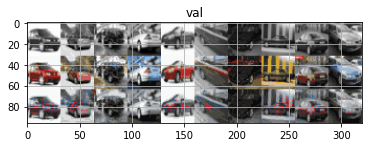

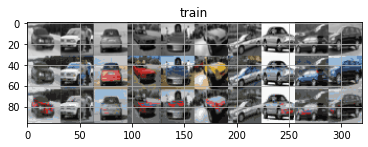

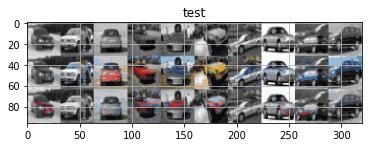

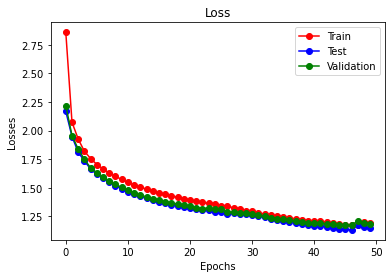

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':64, 
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"UNet", 
              'kernel':3,
              'learn_rate':0.3, 
              'batch_size':100,
              'epochs':50,
              'plot':True, 
              'experiment_name': 'colourization_CustomUnet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours , model_mode="UNet" ,model="UNet")

### Experiment4 with different parameters

True
Transforming data...
1
Beginning training ...
Epoch [1/50], Train Loss: 1.79, Train Acc: 37.5% 
Epoch [1/50], Test Loss: 1.48, Test Acc: 48.4% 
Epoch [1/50], Val Loss: 1.54, Val Acc: 46.6% 


Epoch [2/50], Train Loss: 1.52, Train Acc: 45.0% 
Epoch [2/50], Test Loss: 1.37, Test Acc: 51.9% 
Epoch [2/50], Val Loss: 1.42, Val Acc: 50.0% 


Epoch [3/50], Train Loss: 1.43, Train Acc: 47.8% 
Epoch [3/50], Test Loss: 1.32, Test Acc: 53.6% 
Epoch [3/50], Val Loss: 1.37, Val Acc: 51.6% 


Epoch [4/50], Train Loss: 1.38, Train Acc: 49.4% 
Epoch [4/50], Test Loss: 1.28, Test Acc: 54.4% 
Epoch [4/50], Val Loss: 1.34, Val Acc: 52.0% 


Epoch [5/50], Train Loss: 1.34, Train Acc: 50.6% 
Epoch [5/50], Test Loss: 1.25, Test Acc: 55.0% 
Epoch [5/50], Val Loss: 1.32, Val Acc: 52.5% 


Epoch [6/50], Train Loss: 1.32, Train Acc: 51.4% 
Epoch [6/50], Test Loss: 1.24, Test Acc: 55.0% 
Epoch [6/50], Val Loss: 1.30, Val Acc: 52.9% 


Epoch [7/50], Train Loss: 1.30, Train Acc: 52.0% 
Epoch [7/50], Test Loss

CustomUNET(
  (downs): ModuleList(
    (0): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
    (1): DownConv(
      (down_conv): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
    )
  )
  (bottleneck): Bottleneck(
    (bottle): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (ups): ModuleList(
   

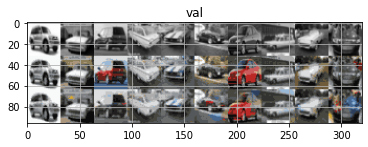

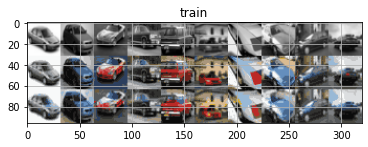

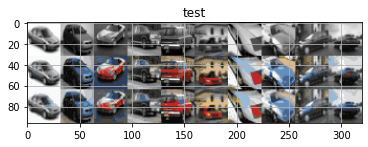

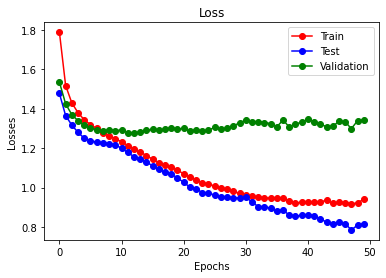

In [11]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':32, 
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"UNet", 
              'kernel':3,
              'learn_rate':0.01, 
              'batch_size':50,
              'epochs':50,
              'plot':True, 
              'experiment_name': 'colourization_CustomUnet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours ,)

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':32, 
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"UNet", 
              'kernel':3,
              'learn_rate':0.01, 
              'batch_size':50,
              'epochs':50,
              'plot':True, 
              'experiment_name': 'colourization_CustomUnet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours ,)

True
Transforming data...
Beginning training ...
Epoch [1/50], Train Loss: 1.78, Train Acc: 37.4% 
Epoch [1/50], Test Loss: 1.49, Test Acc: 47.9% 
Epoch [1/50], Val Loss: 1.56, Val Acc: 45.6% 


Epoch [2/50], Train Loss: 1.53, Train Acc: 44.8% 
Epoch [2/50], Test Loss: 1.38, Test Acc: 51.3% 
Epoch [2/50], Val Loss: 1.43, Val Acc: 49.7% 


Epoch [3/50], Train Loss: 1.44, Train Acc: 47.6% 
Epoch [3/50], Test Loss: 1.32, Test Acc: 53.2% 
Epoch [3/50], Val Loss: 1.38, Val Acc: 51.3% 


Epoch [4/50], Train Loss: 1.39, Train Acc: 49.3% 
Epoch [4/50], Test Loss: 1.30, Test Acc: 53.8% 
Epoch [4/50], Val Loss: 1.36, Val Acc: 51.8% 


Epoch [5/50], Train Loss: 1.35, Train Acc: 50.5% 
Epoch [5/50], Test Loss: 1.27, Test Acc: 54.8% 
Epoch [5/50], Val Loss: 1.33, Val Acc: 52.7% 


Epoch [6/50], Train Loss: 1.33, Train Acc: 51.3% 
Epoch [6/50], Test Loss: 1.25, Test Acc: 55.1% 
Epoch [6/50], Val Loss: 1.31, Val Acc: 53.1% 


Epoch [7/50], Train Loss: 1.31, Train Acc: 51.9% 
Epoch [7/50], Test Loss: 

# Extra Points: U-Net with Residual block

Based on the concept of Residual Learning, convert DownConv, UpConv and BottelNeck to Residual block.Then modify the `train` function to get result.

<br>
<p align="center">
  <img src="images/ResidualBlock.png">
</p>

## Training

True
Transforming data...
1
Beginning training ...
Epoch [1/50], Train Loss: 2.63, Train Acc: 26.3% 
Epoch [1/50], Test Loss: 2.03, Test Acc: 39.4% 
Epoch [1/50], Val Loss: 2.68, Val Acc: 37.1% 


Epoch [2/50], Train Loss: 1.97, Train Acc: 39.6% 
Epoch [2/50], Test Loss: 1.89, Test Acc: 41.4% 
Epoch [2/50], Val Loss: 1.89, Val Acc: 41.2% 


Epoch [3/50], Train Loss: 1.84, Train Acc: 43.2% 
Epoch [3/50], Test Loss: 1.73, Test Acc: 49.1% 
Epoch [3/50], Val Loss: 1.75, Val Acc: 48.3% 


Epoch [4/50], Train Loss: 1.75, Train Acc: 46.1% 
Epoch [4/50], Test Loss: 1.68, Test Acc: 49.4% 
Epoch [4/50], Val Loss: 1.68, Val Acc: 49.2% 


Epoch [5/50], Train Loss: 1.69, Train Acc: 47.4% 
Epoch [5/50], Test Loss: 1.61, Test Acc: 51.2% 
Epoch [5/50], Val Loss: 1.61, Val Acc: 51.1% 


Epoch [6/50], Train Loss: 1.64, Train Acc: 49.7% 
Epoch [6/50], Test Loss: 1.59, Test Acc: 52.7% 
Epoch [6/50], Val Loss: 1.58, Val Acc: 52.4% 


Epoch [7/50], Train Loss: 1.60, Train Acc: 51.5% 
Epoch [7/50], Test Loss

CustomUNETResidual(
  (downs): ModuleList(
    (0): DownConvResidual(
      (r): ReLU()
      (b1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (s): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
      (max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (b3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): DownConvResidual(
      (r): ReLU()
      (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv2d(

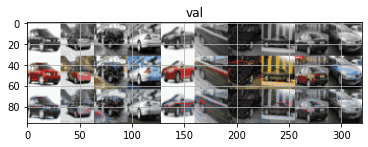

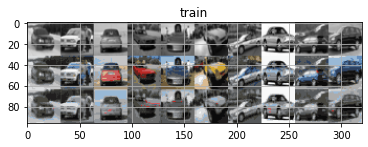

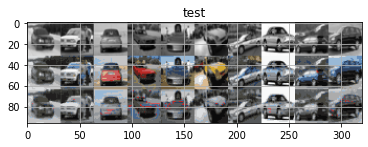

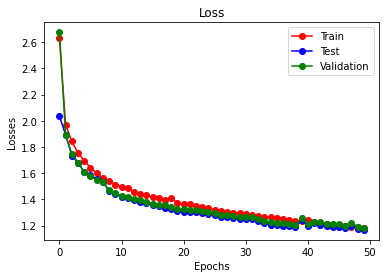

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':64, 
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"Residual",
              'kernel':3,
              'learn_rate':0.3, 
              'batch_size':100,
              'epochs':50, 
              'plot':True, 
              'experiment_name': 'colourization_Residual',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours )

###UNET

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':64, 
              'seed':your_student_id,
              'category_id': 1,
              'valid':False, 
              'checkpoint':"",  
              'model':"UNET",
              'kernel':3,
              'learn_rate':0.3, 
              'batch_size':100,
              'epochs':50, 
              'plot':True, 
              'experiment_name': 'colourization_Residual',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
train(args , x_train, y_train, x_test, y_test, colours=colours )

True
Transforming data...
1
Beginning training ...


RuntimeError: ignored

# Refrences

- https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
- http://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf
- Intro to optimization in deep learning: Busting the myth about batch normalization [[link](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/)]
- Why Does Batch Normalization Work? [[link](https://abay.tech/blog/2018/07/01/why-does-batch-normalization-work/)]
- https://arxiv.org/abs/1505.04597
